In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Annual Emmissions Development.csv", index_col=0)

df = df.rename(columns={"Unnamed: 0": "rok", "0": "emissions_per_kwh"})

df = df.transpose()
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
emissions_per_kwh,0.501099,0.499158,0.501063,0.504227,0.50432,0.497428,0.484564,0.473826,0.471351,0.466487,0.457296,0.443911,0.426523,0.405379,0.380771,0.353027,0.322499


In [10]:
black_coal = 2775
gas = 1155
electricity = 10454
heat_pump = 324
coal_em_per_kg = 3.64
gas_em_per_kg = 1.85

In [11]:
emissions_per_source = [
    black_coal,
    gas,
    electricity,
    heat_pump,
    coal_em_per_kg,
    gas_em_per_kg,
]
emissions_per_source

[2775, 1155, 10454, 324, 3.64, 1.85]

In [12]:
flat_80_sqm = pd.DataFrame(columns=df.columns)

flat_80_sqm.loc["UH"] = black_coal * coal_em_per_kg
flat_80_sqm.loc["PL"] = gas * gas_em_per_kg
flat_80_sqm.loc["TC"] = df.loc["emissions_per_kwh"] * heat_pump
flat_80_sqm.loc["EL"] = df.loc["emissions_per_kwh"] * electricity

flat_80_sqm

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
UH,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000
PL,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000,2136.750000
TC,162.356022,161.727211,162.344256,163.369572,163.399599,161.166614,156.998664,153.519779,152.717818,151.141729,148.164002,143.827124,138.193413,131.342749,123.369759,114.380639,104.489801
EL,5238.487195,5218.198333,5238.107564,5271.189837,5272.158669,5200.110435,5065.629740,4953.382013,4927.506389,4876.653189,4780.575555,4640.644304,4458.870174,4237.830536,3980.578579,3690.540751,3371.408588


<AxesSubplot: >

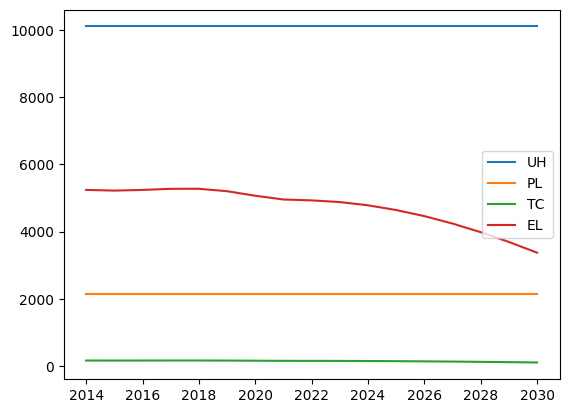

In [13]:
flat_80_sqm.transpose().plot()